In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [39]:
crime = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")
crime = crime[(crime['Latitude'] >= 37.76) & (crime['Latitude'] <= 37.80)
              & (crime['Longitude'] >= -122.44) & (crime['Longitude'] <= -122.38)]

In [40]:
crime.shape[0]

27424

In [41]:
catData = crime['Incident Category'].value_counts().rename('catCount').to_frame().reset_index()
# catData['level'] = [3,4,0,5,1,0,5,1,1,2,5,2,2,2,2,1,1,2,0,0,5,2,5,2,2,2,4,2,5,0,0,3,5,0,0,4,5,0,0,5,4,2,5,0,2,3]
catData['level'] = [2,3,-1,3,-1,-1,3,2,2,-1,3,3,-1,3,-1,-1,1,3,-1,-1,3,-1,3,2,2,3,3,3,-1,-1,1,3,3,-1,-1,3,3,-1,-1,-1,1,3,2,3,-1,3]
level = catData['level']
category = catData['index']

In [42]:
def getLevel(a):
    return level[a == category].iloc[0]
crime['level'] = list(map(getLevel, crime['Incident Category']))
crimeFiltered = crime[crime['level'] != -1]

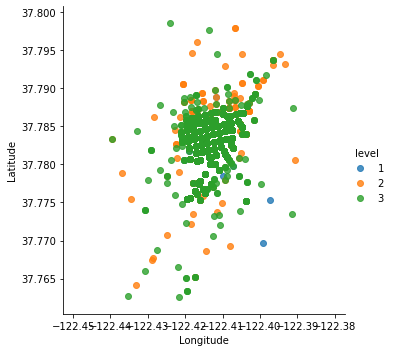

In [43]:
lm = sns.lmplot(x = 'Longitude', y = 'Latitude', hue = 'level', data = crimeFiltered, fit_reg = False)

In [44]:
from sklearn.model_selection import train_test_split
X = crimeFiltered[['Latitude', 'Longitude']]
y = crimeFiltered['level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=60)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform')

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0   16   71]
 [   0  744  656]
 [   0  376 1528]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        87
           2       0.65      0.53      0.59      1400
           3       0.68      0.80      0.73      1904

    accuracy                           0.67      3391
   macro avg       0.44      0.44      0.44      3391
weighted avg       0.65      0.67      0.65      3391



/Users/gary/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
predData = pd.DataFrame({
    'Longitude': X_test['Longitude'],
    'Latitude': X_test['Latitude'],
    'y_test': y_test,
    'y_pred': y_pred
})

In [49]:
predData

,Longitude,Latitude,y_test,y_pred
2213,-122.412970,37.785790,3,3
21469,-122.409245,37.781398,3,3
22722,-122.409693,37.781754,2,3
11918,-122.412782,37.784866,3,3
6098,-122.413866,37.781863,2,3
...,...,...,...,...
5316,-122.408493,37.784453,2,2
27006,-122.411700,37.781177,3,3
5622,-122.407337,37.784560,2,2
10440,-122.416983,37.782420,3,3


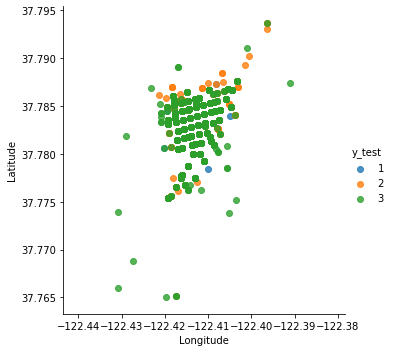

In [50]:
lm = sns.lmplot(x = 'Longitude', y = 'Latitude', hue = 'y_test', data = predData, fit_reg = False)

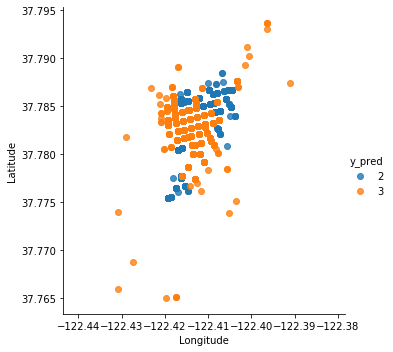

In [51]:
lm = sns.lmplot(x = 'Longitude', y = 'Latitude', hue = 'y_pred', data = predData,fit_reg = False)


In [52]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

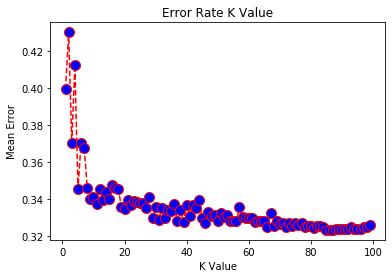

In [53]:
# plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')